In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/final.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [4]:
X = df.drop('average',axis=1)
y= df['average']

In [5]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [6]:
num_cols = X.select_dtypes(exclude='object').columns
cat_cols = X.select_dtypes(include='object').columns


In [7]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer


In [8]:
cat_cols

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [9]:
ohe = OneHotEncoder()
scaler = StandardScaler()

preprocessor= ColumnTransformer(
    [
    ('OneHotEncoder',ohe,cat_cols),
    ('StandardScaler',scaler,num_cols)
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 21)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape    

((800, 21), (200, 21), (800,), (200,))

In [13]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [14]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=False),
    'AdaBoost': AdaBoostRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

In [15]:
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae,train_rmse,train_r2 = evaluate_model(y_train,y_train_pred)
    test_mae,test_rmse,test_r2 = evaluate_model(y_test,y_test_pred)

    print(f"Model: {list(models.keys())[i]}")
    model_list.append(list(models.keys())[i])

    print('Model Performance on Training Set')
    print('-'*30)
    print(f"MAE: {train_mae}")
    print(f'RMSE: {train_rmse}')
    print(f'R2 Score: {train_r2}')
    print('\n')

    print('Model Performance on Test Set')
    print('-'*30)
    print(f"MAE: {test_mae}")
    print(f'RMSE: {test_rmse}')
    print(f'R2 Score: {test_r2}')
    r2_list.append(test_r2)

    print('='*50)
    print('\n')

Model: Linear Regression
Model Performance on Training Set
------------------------------
MAE: 1.106226221736506e-14
RMSE: 1.3800246365136264e-14
R2 Score: 1.0


Model Performance on Test Set
------------------------------
MAE: 1.120881165661558e-14
RMSE: 1.3697542761304505e-14
R2 Score: 1.0


Model: Decision Tree
Model Performance on Training Set
------------------------------
MAE: 9.414691248821328e-16
RMSE: 3.4261129972154534e-15
R2 Score: 1.0


Model Performance on Test Set
------------------------------
MAE: 0.08333333333333341
RMSE: 0.6724747000610666
R2 Score: 0.9978904255954921


Model: Random Forest
Model Performance on Training Set
------------------------------
MAE: 0.02473750000001191
RMSE: 0.1141052754647603
R2 Score: 0.9999347202278094


Model Performance on Test Set
------------------------------
MAE: 0.11566666666666445
RMSE: 0.926793276722364
R2 Score: 0.9959930982189336


Model: XGBoost
Model Performance on Training Set
------------------------------
MAE: 0.0083445413

In [16]:
pd.DataFrame({'Model':model_list,'R2_Score':r2_list}).sort_values(by='R2_Score',ascending=False)

,Model,R2_Score
0,Linear Regression,1.000000
1,Decision Tree,0.997890
3,XGBoost,0.997431
2,Random Forest,0.995993
4,CatBoost,0.994961
5,AdaBoost,0.992639
7,KNN,0.966842
6,SVR,0.862219


In [19]:
Dt = DecisionTreeRegressor()
Dt.fit(X_train,y_train)    
y_pred = Dt.predict(X_test)
accuracy = r2_score(y_test,y_pred)
print(f'Accuracy of the model is: {accuracy*100:.2f}%')

Accuracy of the model is: 99.78%


Text(0, 0.5, 'Predicted Values')

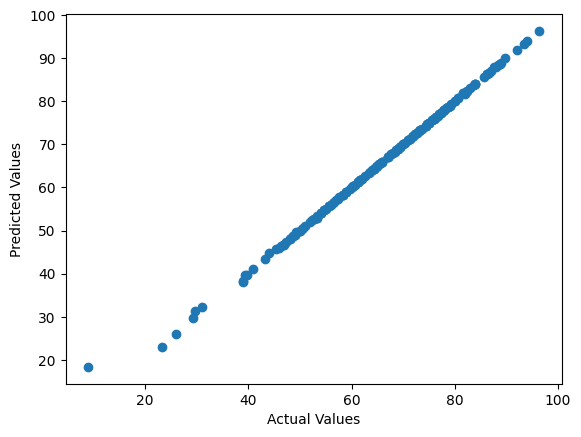

In [20]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')